# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Reading

In [2]:
df= pd.read_csv('./car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Count of cars based on Car Names

Text(0, 0.5, 'Count of Cars')

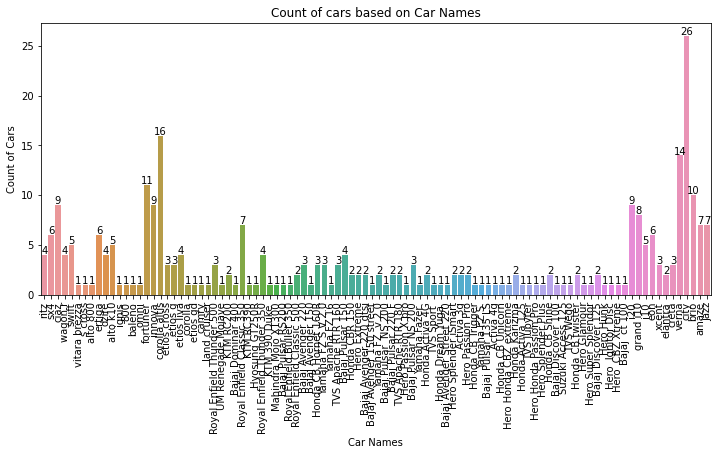

In [5]:
plt.figure(figsize = (12, 5))
plot = sns.countplot(x = 'Car_Name', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 4),
                        textcoords = 'offset points')

plt.title("Count of cars based on Car Names")
plt.xlabel("Car Names")
plt.ylabel("Count of Cars")

Checking relation between Fuel type and Selling Price

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

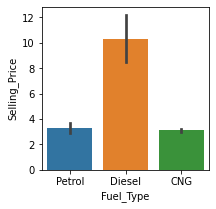

In [6]:
plot=plt.figure(figsize=(3,3))
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df)

Checking relation between Seller type and Selling Price

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

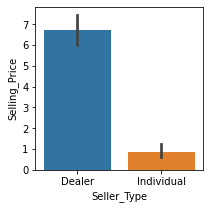

In [7]:
plot=plt.figure(figsize=(3,3))
sns.barplot(x='Seller_Type',y='Selling_Price',data=df)

Checking relation between Transmission and Selling Price

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

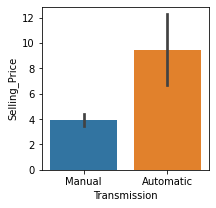

In [8]:
plot=plt.figure(figsize=(3,3))
sns.barplot(x='Transmission',y='Selling_Price',data=df)

# Data Preprocessing

In [9]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

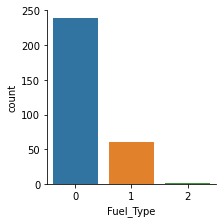

In [10]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
sns.catplot(x=df['Fuel_Type'],data=df,kind='count',height=3)

In [11]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

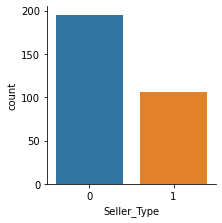

In [12]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
sns.catplot(x=df['Seller_Type'],data=df,kind='count',height=3)

In [13]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

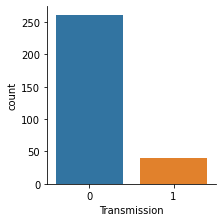

In [14]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
sns.catplot(x=df['Transmission'],data=df,kind='count',height=3)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [16]:
cor=df.corr()

<AxesSubplot:>

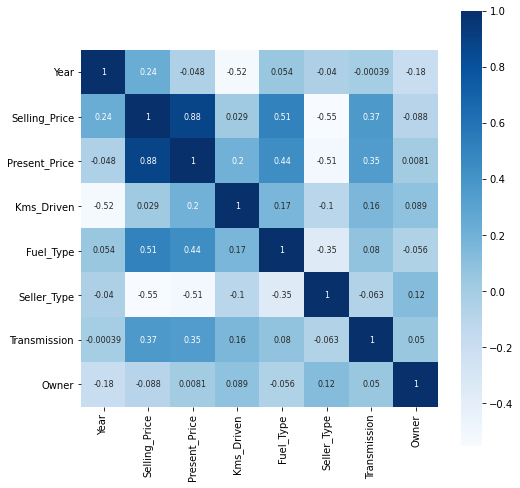

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(cor,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')

Checking Missing values are present are not

In [18]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
X=df.drop(['Selling_Price','Car_Name'],axis=1)
y=df['Selling_Price']

Splitting the dataset

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((255, 7), (46, 7), (255,), (46,))

# Model Training

1) Linear Regression

In [22]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.8788102076855941, 0.8635018684159645)

2) Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train),rf.score(X_test,y_test)

(0.9886400609539061, 0.9785730073264582)

3) Lasso Regression

In [25]:
lasso_model=Lasso()
lasso_model.fit(X_train,y_train)
lasso_model.score(X_train,y_train),lasso_model.score(X_test,y_test)

(0.8400293350672263, 0.8940142482159172)

# Building Predictive sysytem

In [26]:
df[df['Car_Name']=='baleno']

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
40,baleno,2016,5.85,7.87,24524,0,0,1,0


In [27]:
input_data=(2016,7.87,24524,0,0,1,0)

#changing the input data to array
input_data_array=np.array(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped=input_data_array.reshape(1,-1)

# Prediction of Selling Price of Car

In [28]:
prediction= rf.predict(input_data_reshaped)
print('Price of Car','is',prediction)

Price of Car is [5.856]
